<a href="https://colab.research.google.com/github/Elahehpouryaghoub/Breast_Cancer_Classification/blob/main/breast_cancer_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1.Load Dataset

In [129]:
from sklearn.datasets import load_breast_cancer
bc = load_breast_cancer()

In [127]:
# Display dataset description
print(bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [138]:
print(bc.target_names)


['malignant' 'benign']


In [139]:
import numpy as np
print(np.unique(bc.target, return_counts=True))

#the dataset does not follow the usual convention where 1 means unhealthy—instead, it uses:

# 1 = Benign (No Cancer)
# 0 = Malignant (Cancer Present)

(array([0, 1]), array([212, 357]))


In [140]:
bc.data.shape

(569, 30)

In [141]:
# Dataset shape
bc.target.shape


(569,)

## 2.Preprocessing

In [131]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(bc.data , bc.target , test_size = 0.2 , random_state= 42)

In [132]:
#Normalizing the feature values to the range [0,1] for better model performance
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train[0]

array([0.06552721, 0.25769361, 0.07732252, 0.03436883, 0.48722578,
       0.41750565, 0.73336457, 0.21744533, 0.50400427, 0.64237574,
       0.07818215, 0.18427334, 0.05314988, 0.02029892, 0.26637658,
       0.62943491, 0.76717172, 0.62928585, 0.63623129, 0.29933115,
       0.05964476, 0.28331557, 0.05597072, 0.02508436, 0.523195  ,
       0.44938009, 1.        , 0.60137457, 0.52493594, 0.52950153])

## 3. Defining Evaluation Metrics


In [ ]:
# making a function for accuracy, recall , precision , and F1
from sklearn.metrics import accuracy_score , recall_score , precision_score , f1_score

def calculating_metrics(y_test , y_train , y_pred_test , y_pred_train):

  acc_train = accuracy_score(y_true = y_train , y_pred= y_pred_train)
  acc_test = accuracy_score(y_true=y_test , y_pred= y_pred_test)

  recall = recall_score(y_true=y_test , y_pred= y_pred_test)
  precision=  precision_score(y_true= y_test , y_pred= y_pred_test)
  f1 = f1_score(y_true = y_test , y_pred = y_pred_test)

  #Since the dataset is imbalanced(common in medical datasets),meaning one class is much more common than the other,
  #F1 balances Precision and Recall


  return {
        "Train Accuracy": acc_train,
        "Test Accuracy": acc_test,
        "Recall": recall,
        "Precision": precision,
        "F1-Score": f1
    }


## 4. Defining and Training Models

# Naive Bayes

In [ ]:
#naive bayes classification
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train , y_train)


GaussianNB()

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 5 , algorithm = "kd_tree")
knn.fit(x_train , y_train)
#kd_tree is used for data with low dimensionality. here ours is 30


KNeighborsClassifier(algorithm='kd_tree')

## Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth =8 , min_samples_split=5 , min_samples_leaf=5 , criterion="entropy")
dt.fit(x_train , y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=5,
                       min_samples_split=5)

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators= 400 , max_depth= 64 , min_samples_split= 5 )
rf.fit(x_train , y_train)

RandomForestClassifier(max_depth=64, min_samples_split=5, n_estimators=400)

# SVM

In [ ]:
from sklearn.svm import SVC #support vector classifier
svm = SVC(kernel="poly")
svm.fit(x_train , y_train)

SVC(kernel='poly')

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train , y_train)

LogisticRegression()

# ANN

In [ ]:
from sklearn.neural_network import MLPClassifier
ann = MLPClassifier(hidden_layer_sizes= (100 , 50) , activation= "relu" , max_iter= 200)
ann.fit(x_train , y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(100, 50))

## 5. Evaluating Models

In [133]:
import pandas as pd
import matplotlib.pyplot as plt

# Dictionary of trained models
models = {
    "Naive Bayes": gnb,
    "KNN": knn,
    "Decision Tree": dt,
    "Random Forest": rf,
    "SVM": svm,
    "Logistic Regression": lr,
    "ANN" : ann,
}

results = []  # To Store model results

# Loop through models and calculate metrics
for name, model in models.items():
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    metrics = calculating_metrics(y_test, y_train, y_pred_test, y_pred_train)
    metrics["Models"] =  name
    results.append(metrics)

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print(results_df)

   Train Accuracy  Test Accuracy    Recall  Precision  F1-Score  \
0        0.936264       0.964912  0.985915   0.958904  0.972222   
1        0.975824       0.964912  0.971831   0.971831  0.971831   
2        0.980220       0.964912  1.000000   0.946667  0.972603   
3        0.995604       0.964912  0.985915   0.958904  0.972222   
4        0.989011       0.982456  1.000000   0.972603  0.986111   
5        0.969231       0.982456  1.000000   0.972603  0.986111   
6        0.993407       0.982456  1.000000   0.972603  0.986111   

                Models  
0          Naive Bayes  
1                  KNN  
2        Decision Tree  
3        Random Forest  
4                  SVM  
5  Logistic Regression  
6                  ANN  


## 6. Visualizing Model Performance


In [134]:
import matplotlib.pyplot as plt

def plot_metric(metric_name, ylabel):
    plt.figure(figsize=(7, 6))
    plt.style.use("seaborn-v0_8-darkgrid")
    colors = ["blue", "green", "red", "orange", "black", "pink", "grey"]
    plt.bar(results_df["Models"], results_df[metric_name], color=colors, edgecolor="black", linewidth=1.5)

    # Add value labels above bars
    for i, value in enumerate(results_df[metric_name]):
        plt.text(i, value + 0.01, f"{value:.2f}", ha="center", fontsize=12, fontweight="bold")

    plt.title(f"Comparison of {metric_name}", fontsize=16, fontweight="bold", pad=15)
    plt.xlabel("Models", fontsize=14, fontweight="bold", labelpad=10)
    plt.ylabel(ylabel, fontsize=14, fontweight="bold", labelpad=10)
    plt.xticks(rotation=45, fontsize=12, ha="right")
    plt.show()

## 7.Generating performance plots


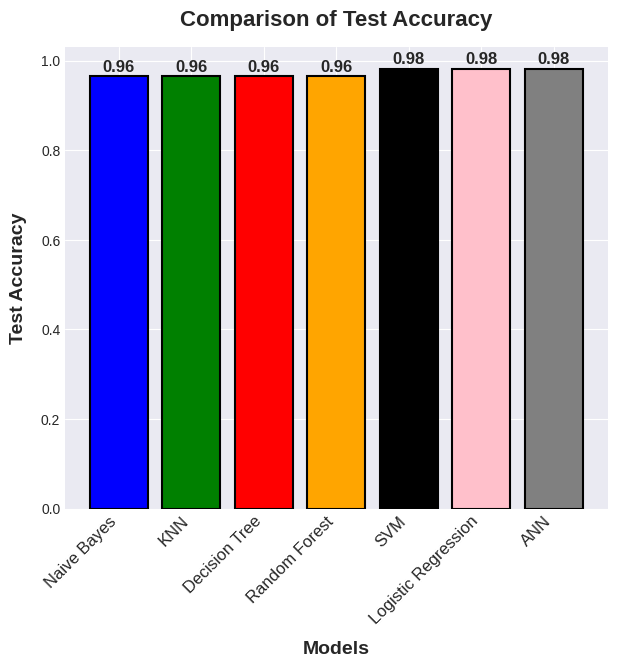

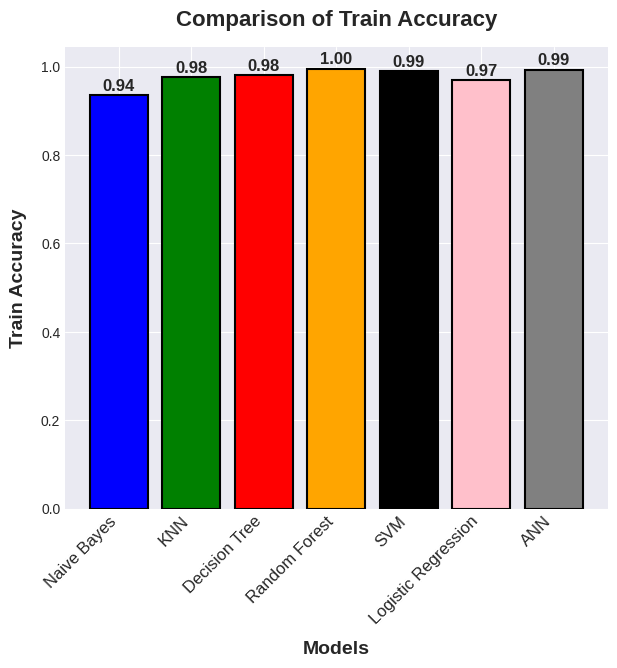

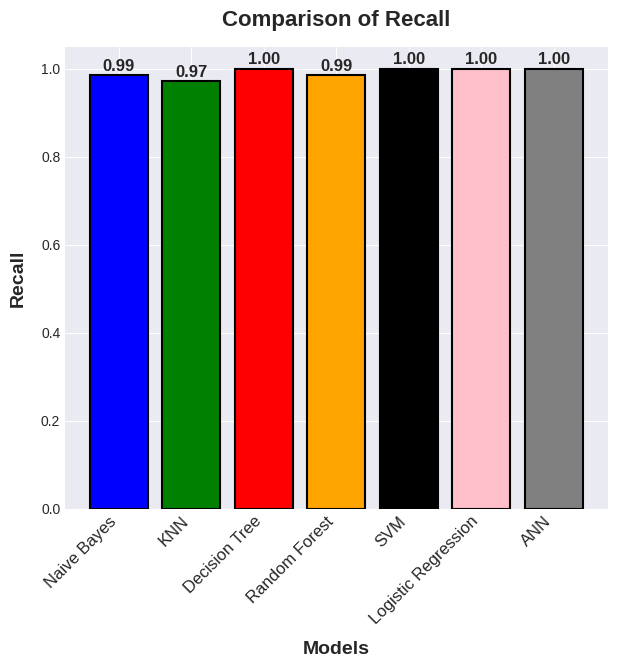

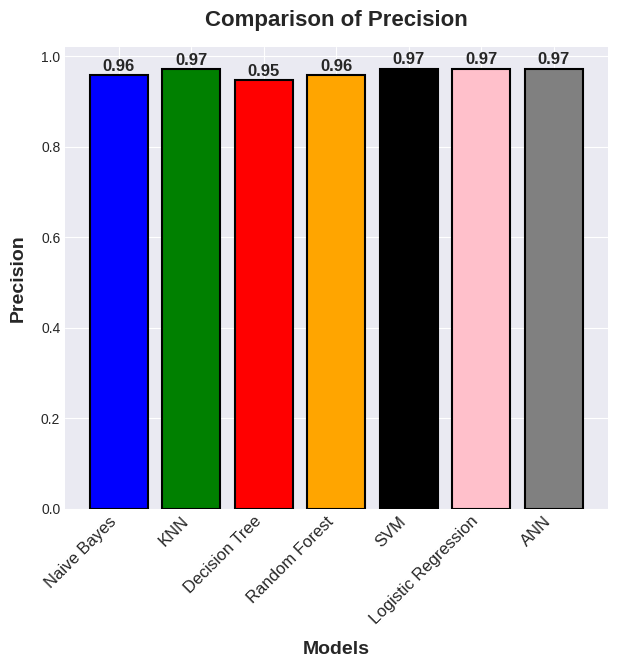

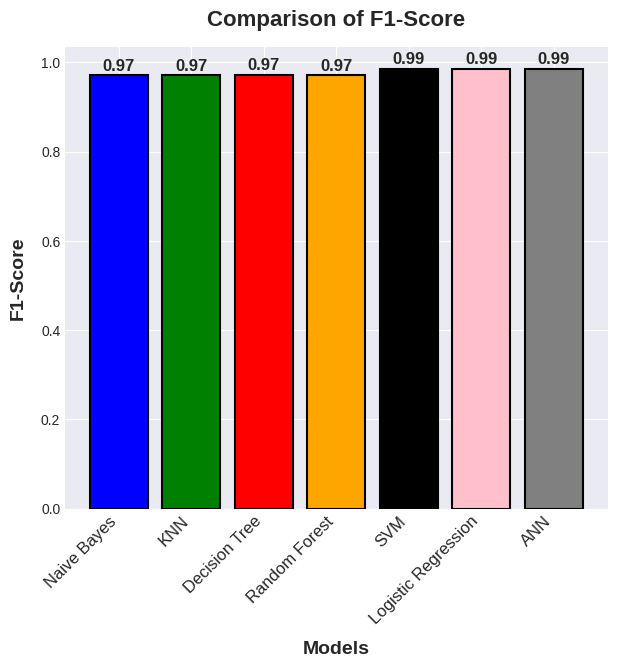

In [135]:
plot_metric("Test Accuracy", "Test Accuracy")
plot_metric("Train Accuracy", "Train Accuracy")
plot_metric("Recall", "Recall")
plot_metric("Precision", "Precision")
plot_metric("F1-Score", "F1-Score")